In [1]:
# load in images
# test 
import numpy as np
import io
import torch
import torch.nn as nn
import math
from collections import OrderedDict
import torchvision.transforms as transforms
from PIL import Image
import os

In [2]:
def read_img(root, filedir, transform=None):
    # Data loading
    with open(filedir, 'r') as f:
        lines = f.readlines()  
    output = []    
    for line in lines:
        linesplit = line.split('\n')[0].split(' ')
        #print(linesplit)
        addr = linesplit[0]
        target = torch.Tensor([float(linesplit[1])])
        img = Image.open(os.path.join(root, addr)).convert('RGB')

        if transform is not None:
            img = transform(img)
        
        output.append([img, target])

    return output

In [3]:
def main():
   
    #root = 'C:/Users/ÍrisBjörkSnorradótti/Desktop/Documents/ABK/AdvancedProject/NeuralNetwork/data/morph2'
    root = './data/morph2'
    valdir = './data/1/test2morph.txt'
    
    print(root, valdir)
    transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])  
    val_dataset = read_img(root, valdir, transform=transform)

    

if __name__ == '__main__':
    main()
    

./data/morph2 ./data/1/test2morph.txt


In [4]:
root = './data/morph2'
valdir = './data/1/test2morph.txt'




#print(root, valdir)
#transform = transforms.Compose([
#        transforms.Resize(256),
#        transforms.CenterCrop(224),
#        transforms.ToTensor(),
#        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])  
#val_dataset = read_img(root, valdir, transform=transform)




In [6]:
import random

import cv2
from matplotlib import pyplot as plt

import os
#os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


import albumentations as A

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

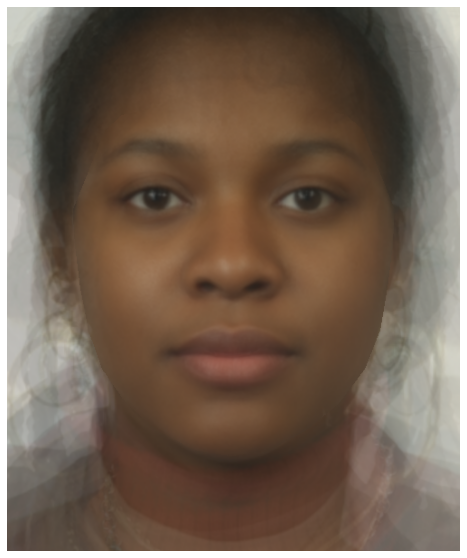

In [26]:
image1 = cv2.imread('./data/morph16/image13.png')
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
visualize(image2)

In [27]:
#image3 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
image4 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

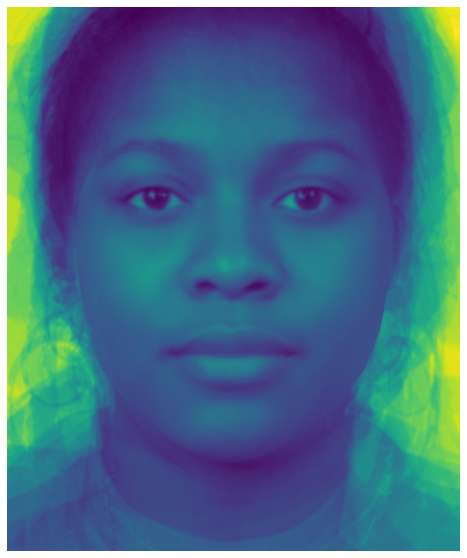

In [28]:
visualize(image4)

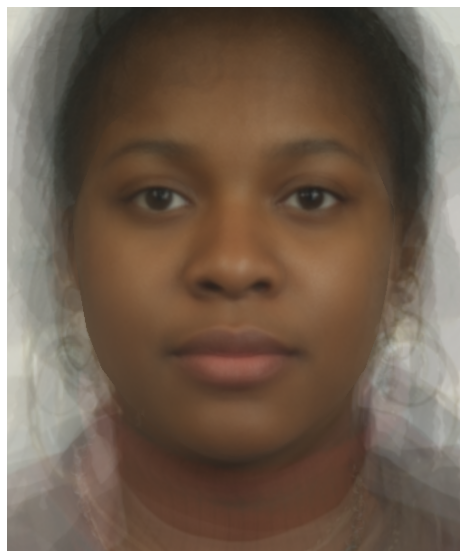

In [29]:
# Flip image horizontally
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)